preprocessing

In [3]:
import torch
import csv
import numpy as np

In [4]:
var_bools = [2,4,5,6,7,13,15,8,9,10,11,12,23]
print(len(var_bools))
var_con = [5,14,15,16,17,18,19,20,21,22,23,24]

13


In [5]:
# print([x for x in zip([1,2,3],[4,5,6])])
def convert(x):
    if x == 'NA':
        x = -1
    return float(x)

In [6]:
with open('data/challenge.csv','r') as file:
    x = csv.reader(file)
#     x.next()
    var_distinct = [{} for i in range(25)]
    table = np.zeros((82852,25))
    for i,z in enumerate(x):
        if i==0:
            var_names = np.array(z)
#             print(var_names)
        if i!=0:
            record = np.array(z)
#             print(record)
            for j in range(25):
                if j in var_con:
                    record[j] = convert(record[j])
                    continue
                if record[j] not in var_distinct[j]:
                    var_distinct[j][(record[j])] = len(var_distinct[j])
                record[j] = var_distinct[j][(record[j])]
            table[i,:] = record
        i = i+1
    print(i)
#     print(table[0:10,:])
    print([len(var_distinct[x]) for x in range(25)])
#         step.append(int(z[1]))
#         acc.append(float(z[2]))

82852
[82851, 82851, 29, 888, 2, 0, 6, 7, 24, 76, 711, 3, 9, 59, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[9.29572365e+01 6.17131960e+00 5.99872059e-01 1.67771059e-01
 6.15562878e-02 2.05187626e-02 1.08628743e-02 6.03493018e-03
 2.41397207e-03 3.62095811e-03]
[-1.   2.2  5.4  8.6 11.8 15.  18.2 21.4 24.6 27.8 31. ]
{}


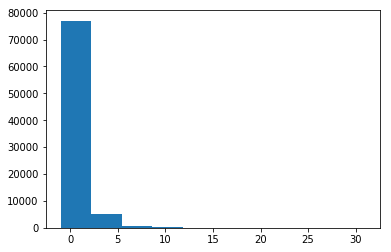

In [54]:
import matplotlib.pyplot as plt
k = 24
data = table[:,k]
# print([i for i in range(int(np.max(data)+1))])
# print(data.dtype)
a,b,c = plt.hist(data,align='mid') #,bins = [i for i in range(len(var_distinct[k])+1)]
# print(data.mean())
print(a/828.51)
print(b)
print(var_distinct[k])

In [5]:
for x in range(25):
    print(var_distinct[x])

{'COCKPEN': 0, 'EDINBURGH': 1, 'CRAMOND': 2, 'DUDDINGSTON': 3, 'BORTHWICK': 4, 'COLINTON': 5, 'CARRINGTON': 6, 'CORSTORPHINE': 7, 'INVERESK': 8, 'FALA AND SOUTRA': 9, 'GLENCORSE': 10, 'HERIOT': 11, 'KIRKLISTON': 12, 'KIRKNEWTON AND EAST CALDER': 13, 'LASSWADE': 14, 'LEITH': 15, 'LIBERTON': 16, 'MID CALDER': 17, 'NEWBATTLE': 18, 'NEWTON': 19, 'PENICUIK': 20, 'STOW': 21, 'TEMPLE': 22, 'WEST CALDER': 23, 'RATHO': 24, 'CRANSTON': 25, 'CRICHTON': 26, 'CURRIE': 27, 'DALKEITH': 28}
{'M': 0, 'F': 1}
{}
{'Single': 0, 'Married': 1, 'Widowed': 2, 'Married spouse absent': 3, 'Not known': 4, 'Divorced': 5}
{'None': 0, 'Physical': 1, 'Blind': 2, 'Deaf': 3, 'Deaf & Dumb or Dumb': 4, 'Multiple': 5, 'Idiot or insane': 6}
{'SCT': 0, 'DEU': 1, 'POL': 2, 'IRL': 3, 'ENG': 4, 'WAL': 5, 'RUS': 6, 'ZAF': 7, 'UNK': 8, 'ESP': 9, 'USA': 10, 'SWE': 11, 'PRT': 12, 'IND': 13, 'DMA': 14, 'NOR': 15, 'ITA': 16, 'BWI': 17, 'IDN': 18, 'SAM': 19, 'FRA': 20, 'GIB': 21, 'IOM': 22, 'AUS': 23, 'ATG': 24, 'TUR': 25, 'MLT': 26

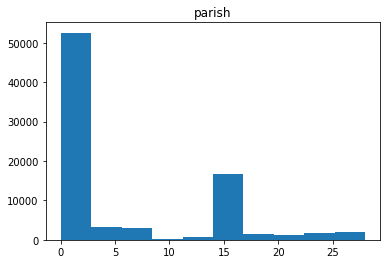

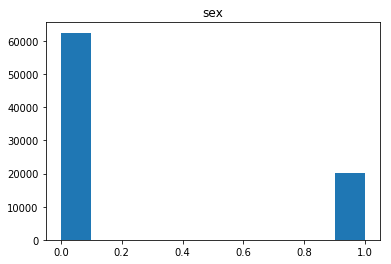

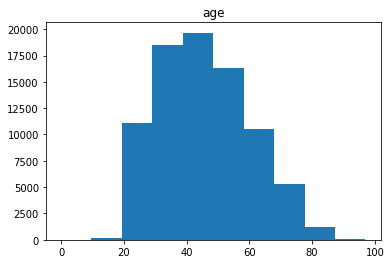

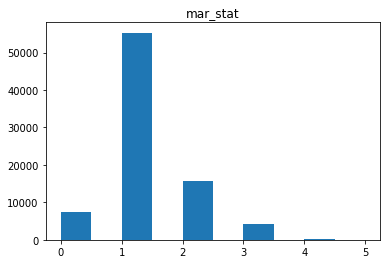

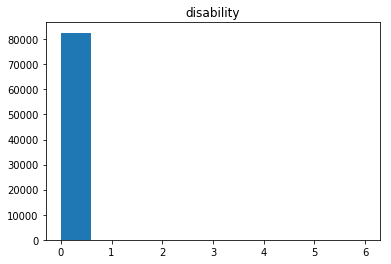

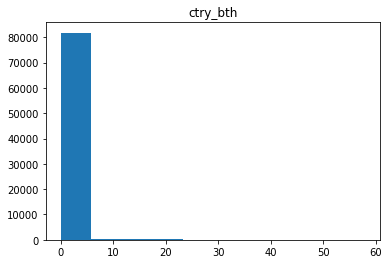

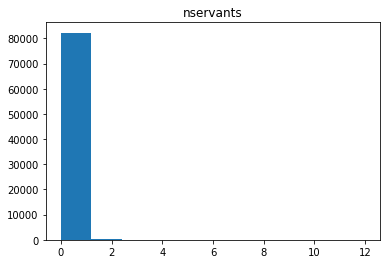

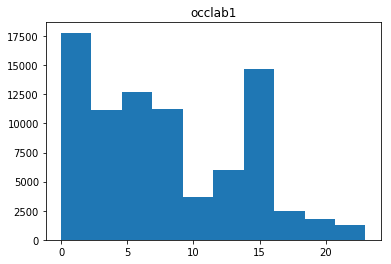

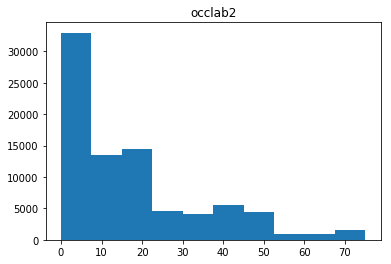

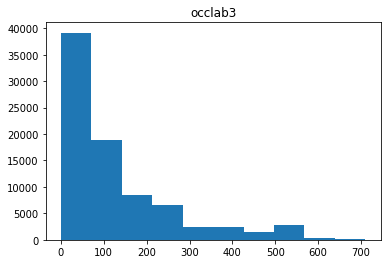

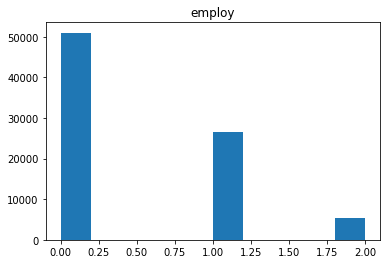

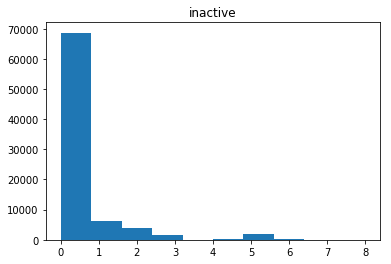

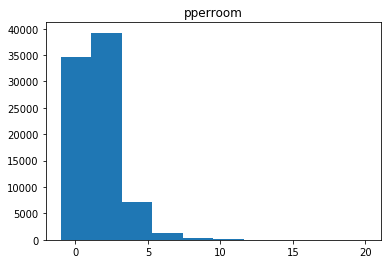

In [7]:
import matplotlib.pyplot as plt
# for i in range(13):
#     plt.figure()
#     plt.hist(table[:,i])
#     plt.title(var_names[i])
# plt.show()
# table[:,0]

In [7]:
np.save('ICEM_preprocessed_new.npy',table[:,[2,4,6,7,11,12,13,15,23]])
np.save('categories_new.npy',var_distinct)

Main

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

table = np.load('ICEM_preprocessed.npy')
print(table.shape)
np.random.shuffle(table)
var_distinct = np.load('categories.npy')
mean = np.mean(table,axis=0)
print('mean',mean)
std = np.std(table,axis=0)
print('std',std)
var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
# TODO: change to argmax representation
def decode_record(data):
    print(data.size())
    records = []
    for d in data:
        record = []
        length=0
        for j in range(13):
            if j==2 or j==6 or j==12:
                record.append((d[j]*std[j]+mean[j]).data.storage().tolist()[0])
            else:
                for k in var_distinct[j].keys():
                    index = d.narrow(0,length,var_num[j]).argmax()
                    if var_distinct[j][k]==index:
                        record.append(index)
            length = length+var_num[j]
        records.append(record)
                    
#         record = []
#         length=0
#         for i in range(len(self.var_num)):
#             if var_num[i] == 1:
#                 record.append((data[i]*std[i]+mean[i]).data.storage())
#             else:
#                 record.append(x.narrow(1,length,var_num[i]).argmax(dim=1).float())
#             length = length+self.var_num[i]
    return records

(82852, 13)
mean [5.97913146e+00 2.45051417e-01 4.57309037e+01 1.21072515e+00
 8.95572829e-03 7.52607058e-01 4.82788587e-02 7.97303626e+00
 1.74230314e+01 1.24187817e+02 4.48981316e-01 3.78482113e-01
 1.73682251e+00]
std [  7.48145079   0.43011768  14.26714669   0.67480782   0.17451697
   2.55874869   0.36919086   5.66904105  16.87366052 137.68340342
   0.61390634   1.03967984   1.36611147]


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

continuous = table[:,[2,6,12]]
stda = StandardScaler()
continuous = stda.fit_transform(continuous)
print(stda.mean_)
print(stda.var_)
table[:,[2,6,12]] = continuous
print(table[0:10,[2,6,12]])
enc = OneHotEncoder(categorical_features=[True,True,False,True,True,True,False,True,True,True,True,True,False])
# x = table[0:10,:]
# print(enc)
enc.fit(table)
preprocessed = enc.transform(table[np.random.randint(table.shape[0],size=[5000]),:])
print(preprocessed.todense().shape)

[45.73090366  0.04827886  1.73682251]
[2.03551475e+02 1.36301895e-01 1.86626056e+00]
[[-0.68204974 -0.13076938  0.19264716]
 [-0.68204974 -0.13076938  0.19264716]
 [-0.33159424 -0.13076938  2.38866121]
 [ 1.14031885 -0.13076938 -0.90535987]
 [-1.59323403 -0.13076938 -0.17335519]
 [ 0.29922566 -0.13076938 -0.53935753]
 [ 0.78986335 -0.13076938 -0.90535987]
 [ 0.29922566 -0.13076938  1.65665653]
 [ 0.22913456 -0.13076938  2.02265887]
 [ 0.71977225 -0.13076938 -0.90535987]]
(5000, 929)


In [3]:
# print(preprocessed.todense()[0])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(preprocessed.todense())
x = pca.transform(preprocessed.todense())
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,4))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x[:,0],x[:,1],x[:,2])

plt.plot(x[:,0],x[:,1],'.')
# plt.figure(figsize=(16,8))
# plt.plot(x[:,0],x[:,2],'.')
# plt.figure(figsize=(16,8))
# plt.plot(x[:,1],x[:,2],'.')
plt.savefig('pca2.pdf',format='pdf')
plt.show()

<Figure size 500x400 with 1 Axes>

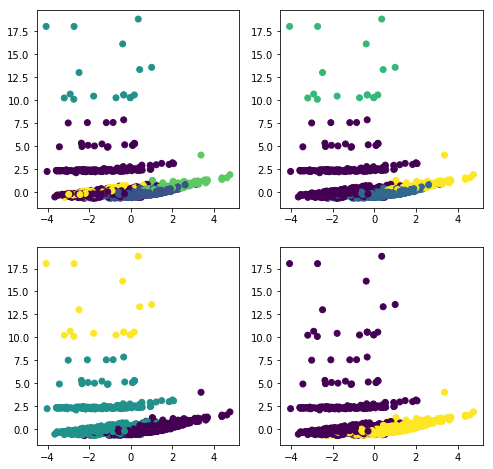

In [4]:
from sklearn.cluster import AgglomerativeClustering
# n_clusters = 5
model = AgglomerativeClustering(n_clusters=5,memory='cache/')
km_result1 = model.fit_predict(preprocessed.todense())
model = AgglomerativeClustering(n_clusters=4,memory='cache/')
km_result2 = model.fit_predict(preprocessed.todense())
model = AgglomerativeClustering(n_clusters=3,memory='cache/')
km_result3 = model.fit_predict(preprocessed.todense())
model = AgglomerativeClustering(n_clusters=2,memory='cache/')
km_result4 = model.fit_predict(preprocessed.todense())
# km_result2 = AgglomerativeClustering(n_clusters=3,memory='cache/').fit_predict(preprocessed.todense())
# km_result3 = AgglomerativeClustering(n_clusters=4,memory='cache/').fit_predict(preprocessed.todense())
# km_result4 = AgglomerativeClustering(n_clusters=5,memory='cache/').fit_predict(preprocessed.todense())

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
ax.scatter(x[:,0],x[:,1],c=km_result1)
ax = fig.add_subplot(222)
ax.scatter(x[:,0],x[:,1],c=km_result2)
ax = fig.add_subplot(223)
ax.scatter(x[:,0],x[:,1],c=km_result3)
ax = fig.add_subplot(224)
ax.scatter(x[:,0],x[:,1],c=km_result4)
plt.savefig('HCA.pdf',format='pdf')
plt.show()

(82852, 118)
components_ [[ 6.78347919e-04 -3.56375468e-02 -5.02251827e-04 ... -6.37532324e-01
  -7.89272220e-02  4.70975930e-01]
 [-1.99899185e-04  1.10974899e-02  4.36509704e-04 ...  3.57349926e-02
   9.55178892e-01  2.86880185e-01]
 [ 8.62375517e-04 -2.53826910e-02 -6.54923523e-04 ...  4.13168545e-01
  -2.77352692e-01  8.23678960e-01]
 ...
 [-5.92479935e-04 -5.92479935e-04 -5.92479935e-04 ... -3.89770681e-17
  -4.47368921e-17  3.10081821e-17]
 [-0.00000000e+00  2.15730577e-17  4.75958073e-17 ...  2.86323633e-18
   1.05922673e-19  1.62957937e-18]
 [ 0.00000000e+00 -2.10676644e-17 -1.50039829e-16 ... -4.28046938e-18
  -2.04504301e-18  1.03222874e-18]] (118, 118)
explained_variance_ [1.52654407e+00 1.01262004e+00 8.43738840e-01 5.76042381e-01
 3.01109669e-01 2.23410468e-01 2.00911094e-01 1.15888684e-01
 1.02989515e-01 8.46342838e-02 7.57484475e-02 6.11743810e-02
 5.95279183e-02 5.41194511e-02 5.09488602e-02 2.80709159e-02
 2.59698240e-02 2.12162529e-02 1.83197335e-02 1.64909820e-02
 1.

After inverse pca [[ 3.72271658e-15  1.00000000e+00  6.03597033e-15 ...  8.89523580e-02
  -1.30769375e-01  5.58649499e-01]
 [ 3.12250226e-16 -1.52100554e-14 -1.77443997e-13 ... -1.66332513e+00
  -1.30769375e-01 -7.83359090e-01]
 [-4.51028104e-17  1.00000000e+00  1.73212139e-15 ... -6.82049738e-01
  -1.30769375e-01 -8.53073822e-01]
 ...
 [ 1.73472348e-16 -3.44169138e-15 -1.31318567e-15 ...  1.35059215e+00
  -1.30769375e-01 -1.73355186e-01]
 [-1.71737624e-16 -2.99760217e-15  4.52762827e-16 ... -5.41867539e-01
  -1.30769375e-01  2.02265887e+00]
 [-3.98986399e-17  1.00000000e+00  3.18321758e-16 ...  2.29134557e-01
  -1.30769375e-01  5.58649499e-01]]
After inverse std [[ 3.72271658e-15  1.00000000e+00  6.03597033e-15 ...  4.70000000e+01
  -4.20011248e-14  2.50000000e+00]
 [ 3.12250226e-16 -1.52100554e-14 -1.77443997e-13 ...  2.20000000e+01
   1.98480121e-13  6.66666667e-01]
 [-4.51028104e-17  1.00000000e+00  1.73212139e-15 ...  3.60000000e+01
   6.40043574e-14  5.71428571e-01]
 ...
 [ 1.734

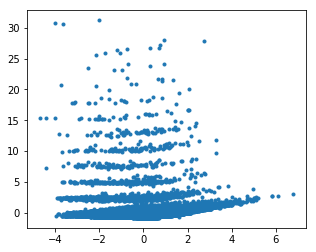

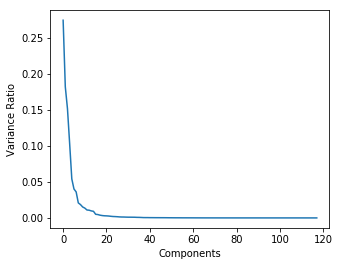

In [7]:
%run analysis2.py

In [ ]:
%run experiment2.py -model WGAN_GP -hs 100

[2, 8, 9]
(82852, 10) [True, True, False, True, True, True, True, True, False, False]
max number [29  2  6  7  3  9 59]
(118, 118)
Generator architecture Generator_WGANGP_basic(
  (dropout1): Dropout(p=0.2)
  (dropout2): Dropout(p=0.2)
  (main): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=100, out_features=118, bias=True)
    (5): ReLU(inplace)
  )
)
Discriminator architecture Discriminator_WGANGP(
  (main): Sequential(
    (0): Linear(in_features=118, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [1]:
%run visual2.py -model WGAN_GP -hs 100

[2, 8, 9]
(82852, 10) [True, True, False, True, True, True, True, True, False, False]
max number [29  2  6  7  3  9 59]
(118, 118)
chi2: s=0.1844820927937233;p=1.0;dof=28
chi2: s=1.227483364387894;p=0.26789702260764875;dof=1
ks: s=0.07727031332979287;p=1.6132982734491066e-215
chi2: s=0.011241625943173208;p=0.9999992901308459;dof=5
chi2: s=0.0037375306507735984;p=0.9999999989138135;dof=6
chi2: s=0.0016670139298979184;p=0.9991668403054905;dof=2
chi2: s=0.06011017744204081;p=0.9999999668087317;dof=8
chi2: s=0.029149133222889676;p=1.0;dof=58
ks: s=0.005527929319750879;p=0.15847751254515857
ks: s=0.11968329068700817;p=0.0
pMSE: 0.03441924470071975


/home/wilburzhai/miniconda3/envs/mlp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


syn_acc:  1.0


/home/wilburzhai/miniconda3/envs/mlp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ori_acc:  1.0
a1 0.6073202673992593
b1 1.9048737269663958
b2 0.7782949619871549
a1 1.736431918710318
b1 3.1553538947977566
b2 1.736431918710318
a1 1.0221958556975412
b1 2.649488566217798
b2 1.152499713926126
a1 1.620061586798787
b1 3.063899611600354
b2 1.620061586798787
a1 1.6406353605993123
b1 3.210672734095986
b2 1.6406353605993123
a1 0.8927185499309372
b1 1.2887749908322443
b2 1.1229913504024256
a1 1.231360961200417
b1 1.3546125742025525
b2 1.2479612503179753
a1 1.847250814704419
b1 2.3713620250941334
b2 2.025486614977649
a1 0.5016562659137273
b1 0.8220101093514257
b2 1.002360337409474
a1 0.6208210150873711
b1 0.6965457844039242
b2 0.8158124760559764
a1 0.16404024826180652
b1 0.7500077657178607
b2 1.341889667182806
IO [0.5495729457141615, 0.7751564446658709, 0.6363733998987943, 0.7643790254525649, 0.7554971335409646, 0.7438173121666123, 0.9478557290451972, 0.8454932566311985, 0.5553774493539725, 0.8261351218667692, 0.17048188562230893]
SD [1.5109989978237146, 0.0346512381516041, 1.3

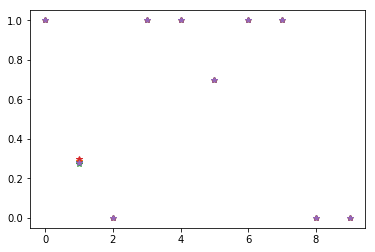

In [27]:
import matplotlib.pyplot as plt
import numpy as np
x1 = [[1.0 ,
0.28149397221634 ,
6.001564111163633e-93 ,
0.9998301738573215 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999892373863323 ,
1.0 ,
0.00012115264697609983 ,
3.64982073516585e-137] ,

[1.0 ,
0.2869986876620555 ,
1.2404465868600147e-78 ,
0.9997104215833178 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999884949765121 ,
1.0 ,
0.0002633953738135127 ,
1.9565713340354295e-129] ,

[1.0 ,
0.27472283713370305 ,
5.832321494731098e-89 ,
0.9998195961369466 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999924735722572 ,
1.0 ,
0.0015933594746154558 ,
1.80895318730098e-121] ,

[1.0 ,
0.2961143918561372 ,
6.067809872652494e-91 ,
0.9997110939106502 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999924819666631 ,
1.0 ,
0.001129793859041124 ,
3.4703491227978846e-125] ,

[1.0 ,
0.2794499336961247 ,
5.6433750287702044e-95 ,
0.9998224795910294 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999922158345753 ,
1.0 ,
0.0005544089642719564 ,
1.35514436102964e-126] ]
plt.plot(np.array(x1).T,'*')
# plt.xticklabels()
plt.savefig('minmax.pdf',format='pdf')

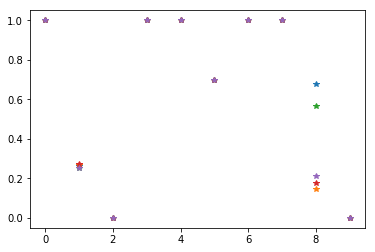

In [26]:
import matplotlib.pyplot as plt
import numpy as np
x2 = [[1.0 ,
0.2621845492266919 ,
1.0955833557628529e-39 ,
0.9997850727434768 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999983445781271 ,
1.0 ,
0.6785103823828891 ,
7.027964270015782e-67] ,

[1.0 ,
0.26741241631723095 ,
3.6569977901479716e-39 ,
0.9999307110589446 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999964468796136 ,
1.0 ,
0.14408243524623565 ,
2.9706465915156703e-59] ,

[1.0 ,
0.2532116268768376 ,
6.796266573665565e-51 ,
0.9998696785199561 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.999997324135557 ,
1.0 ,
0.5654378910227623 ,
1.4512399402685659e-67] ,

[1.0 ,
0.27138221563457166 ,
4.187057734669592e-37 ,
0.9999313744562743 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999976034214899 ,
1.0 ,
0.17632237218081567 ,
9.033012720339562e-56] ,

[1.0 ,
0.25384523304573636 ,
1.5352195344416118e-48 ,
0.9998792246640739 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.999997668191928 ,
1.0 ,
0.21398843459234124 ,
1.2172745785107075e-69] ]
plt.plot(np.array(x2).T,'*')
# plt.xticklabels()
plt.savefig('maxabs.pdf',format='pdf')

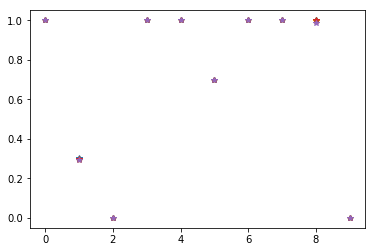

In [25]:
import matplotlib.pyplot as plt
import numpy as np
x3 = [[1.0 ,
0.30255199038075087 ,
1.5089065820240367e-05 ,
0.9999276675097162 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999988482938957 ,
1.0 ,
0.9998550252094187 ,
7.504202356557299e-37] ,

[1.0 ,
0.2904794809588723 ,
9.927006263786259e-05 ,
0.9998550877710094 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999983220453115 ,
1.0 ,
0.9985876709212771 ,
2.3418000426013167e-42] ,

[1.0 ,
0.2989625655614808 ,
9.839221277555443e-08 ,
0.9998457150025402 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999986867529266 ,
1.0 ,
0.9999995936137221 ,
1.1185268619166503e-32] ,

[1.0 ,
0.2961143918561372 ,
1.21161469629241e-05 ,
0.9999165036996452 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999984779769293 ,
1.0 ,
0.999995399595289 ,
5.312917050027871e-44] ,

[1.0 ,
0.29399175596283 ,
5.815213465732734e-07 ,
0.9999326760811712 ,
0.9999999989138135 ,
0.6999749957710786 ,
0.9999986648968141 ,
1.0 ,
0.98750051825725 ,
6.661113788783281e-39] ]
plt.plot(np.array(x3).T,'*')
# plt.xticklabels()
plt.savefig('std.pdf',format='pdf')

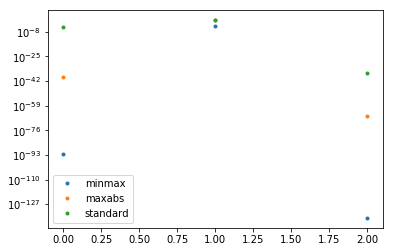

In [24]:
y1 = np.array(x1[0])[[2,8,9]]
y2 = np.array(x2[0])[[2,8,9]]
y3 = np.array(x3[0])[[2,8,9]]
plt.plot(y1,'.')
plt.plot(y2,'.')
plt.plot(y3,'.')
plt.yscale('log')
plt.legend(['minmax','maxabs','standard'])
# plt.show()
plt.savefig('3std.pdf',format='pdf')

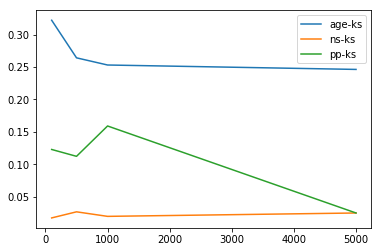

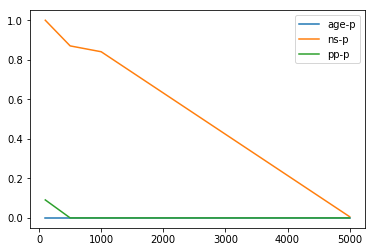

In [26]:
array = np.array(lists)
array = array.reshape(4,3,2)
plt.plot([100,500,1000,5000],array[:,:,0])
plt.legend(['age-ks','ns-ks','pp-ks'])
plt.show()
plt.plot([100,500,1000,5000],array[:,:,1])
plt.legend(['age-p','ns-p','pp-p'])
# plt.yscale('log')
plt.show()

In [6]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

print(sm.datasets.star98.NOTE)
data = sm.datasets.star98.load()
data.exog = sm.add_constant(data.exog, prepend=False)

print(data.endog[:5,:])
print(data.exog[:5,:])

glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

ValueError: endog must be in the unit interval.

In [19]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog)
print(spector_data.endog[:5])
print(spector_data.exog[:5,:])
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
logit_res = logit_mod.fit()
print(logit_res.summary())
print('stat',logit_res.predict(spector_data.exog[:5,:]))

import numpy as np
from sklearn import linear_model
logit = linear_model.LogisticRegression(C = 1e9)

spector_data = sm.datasets.spector.load()
# Fit model. Let X_train = matrix of predictors, y_train = matrix of variable.
# NOTE: Do not include a column for the intercept when fitting the model.
resLogit = logit.fit(spector_data.exog, spector_data.endog)
print(resLogit.coef_,resLogit.intercept_,resLogit.n_iter_)

# Calculate matrix of predicted class probabilities. 
# Check resLogit.classes_ to make sure that sklearn ordered your classes as expected
predProbs = np.matrix(resLogit.predict_proba(spector_data.exog))
print('sklearn',predProbs[:5])
# Design matrix -- add column of 1's at the beginning of your X_train matrix
X_design = np.hstack((np.ones(shape = (spector_data.exog.shape[0],1)), spector_data.exog))

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.matrix(np.zeros(shape = (X_design.shape[0], X_design.shape[0])))
np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)

# Covariance matrix
covLogit = np.linalg.inv(X_design.T * V * X_design)
print ("Covariance matrix: ", covLogit)

# Standard errors
std = np.sqrt(np.diag(covLogit))
print ("Standard errors: ", np.sqrt(np.diag(covLogit)))

logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)

bse = std
q = stats.norm.ppf(1-0.05/2)


lower = logitParams - q * bse
upper = logitParams + q * bse

print(lower)
print(upper)

[0. 0. 0. 0. 1.]
[[ 1.    2.66 20.    0.  ]
 [ 1.    2.89 22.    0.  ]
 [ 1.    3.28 24.    0.  ]
 [ 1.    2.92 12.    0.  ]
 [ 1.    4.   21.    0.  ]]
Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:                  0.3740
Time:                        17:47:09   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [6]:
#!/usr/bin/env python

# Generative Adversarial Networks (GAN) example in PyTorch.
# See related blog post at https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f#.sch4xgsa9
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch import autograd
from tqdm import tqdm_notebook as tqdm

# Data params
data_mean = 4
data_stddev = 1.25

# Model params
g_input_size = 100     # Random noise dimension coming into generator, per output vector
g_hidden_size = 50   # Generator complexity
g_output_size = 929    # size of generated output vector
d_input_size = 929   # Minibatch size - cardinality of distributions
d_hidden_size = 50   # Discriminator complexity
d_output_size = 1    # Single dimension for 'real' vs. 'fake'
minibatch_size = 100

d_learning_rate = 2e-4  # 2e-4
g_learning_rate = 2e-4
optim_betas = (0.9, 0.999)
num_epochs = 10000
print_interval = 200
d_steps = 1  # 'k' steps in the original GAN paper. Can put the discriminator on higher training freq than generator
g_steps = 1

# FIXED_GENERATOR = False  # whether to hold the generator fixed at real data plus
WGAN_GP = True
use_cuda = False
LAMBDA = 10 # Gradient penalty lambda hyperparameter

# ### Uncomment only one of these
(name, preprocess, d_input_func) = ("Raw data", lambda data: narrow_and_expand(data), lambda x: x)
# (name, preprocess, d_input_func) = ("Data and variances", lambda data: decorate_with_diffs(data, 2.0), lambda x: x * 2)

print("Using data [%s]" % (name))

# ##### DATA: Target data and generator input data

def onehot(labels, C):     
    one_hot = torch.FloatTensor(labels.size(0), C).zero_()
#         print(one_hot.size(),labels.unsqueeze(1).long().size())
    target = one_hot.scatter_(1, labels.long(), 1)
    return target

def narrow_and_expand(x):
    list = []
    for i in range(len(var_num)):
        if var_num[i] == 1:
            list.append(((x.narrow(1,i,1)-mean[i])/std[i]))
        else:
            list.append(onehot(x.narrow(1,i,1), var_num[i]))
#             print(list[i].size())

    return Variable(torch.cat(list,1))

class Sampler():
    def __init__(self):
        self.sampler_counter = 0
        
    def get_distribution_sampler(self,mu, sigma):
    #     return lambda n: torch.Tensor(np.random.normal(mu, sigma, (1, n)))  # Gaussian
        if self.sampler_counter+minibatch_size > table.shape[0]:
            np.random.shuffle(table)
            self.sampler_counter = 0
        self.sampler_counter = self.sampler_counter + minibatch_size
        return lambda n: torch.Tensor(table[self.sampler_counter-minibatch_size:self.sampler_counter,:])

    def get_generator_input_sampler(self):
        return lambda m, n: torch.randn(m, n)  # Uniform-dist data into generator, _NOT_ Gaussian

# ##### MODELS: Generator model and discriminator model

class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
    
    def narrow_and_limited(self, x):
        list = []
        length=0
#         print(x.size())
        for i in range(len(self.var_num)):
            if self.var_num[i] == 1:
                list.append(x.narrow(1,length,1))
            else:
                max_value, _ = x.narrow(1,length,self.var_num[i]).max(dim=1)
#                 print(max_value.size(),x.narrow(1,length,self.var_num[i]).size())
#                 list.append(x.narrow(0,length,self.var_num[i]).argmax(dim=0).float())
                neg = x.narrow(1,length,self.var_num[i])-max_value.unsqueeze(1)
#                 print(neg.size())
                list.append(torch.pow(torch.tensor(100.0),neg))
            length = length+self.var_num[i]
#             print(list[i].size())
        return torch.cat(list,1)
    
    def forward(self, x):
        x = F.elu(self.map1(x))
#         print(x.size())
        x = F.sigmoid(self.map2(x))
#         print(x.size())
#         x = self.map3(x)
        result = self.narrow_and_limited(self.map3(x)) 
#         print(result.size())
        return result

class Generator_WGANGP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator_WGANGP, self).__init__()
        main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, output_size),
        )
        self.main = main
    
    def forward(self, noise):
#         if FIXED_GENERATOR:
#             return noise + real_data
#         else:
        output = self.main(noise)
        return output

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
#         self.var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
                
    def forward(self, x):
#         print(x.size())
#         x = self.narrow_and_expand(x)
        x = F.elu(self.map1(x))
        x = F.elu(self.map2(x))
        return F.sigmoid(self.map3(x))

class Discriminator_WGANGP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator_WGANGP, self).__init__()
#         self.var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
        main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, output_size),
        )
        self.main = main

    def forward(self, inputs):
        output = self.main(inputs)
        return output

def calc_gradient_penalty(D, real_data, fake_data):
    # print "real_data: ", real_data.size(), fake_data.size()
    alpha = torch.rand(minibatch_size, 1)
    alpha = alpha.expand(minibatch_size, real_data.nelement()/minibatch_size).contiguous().view(minibatch_size, -1)
    alpha = alpha.cuda(gpu) if use_cuda else alpha
    interpolates = alpha * real_data + ((1 - alpha) * fake_data)

    if use_cuda:
        interpolates = interpolates.cuda(gpu)
    interpolates = autograd.Variable(interpolates, requires_grad=True)

    disc_interpolates = D(interpolates)

    gradients = autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                              grad_outputs=torch.ones(disc_interpolates.size()).cuda(gpu) if use_cuda else torch.ones(
                                  disc_interpolates.size()),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]
    gradients = gradients.view(gradients.size(0), -1)

    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * LAMBDA
    return gradient_penalty    

def extract(v):
    return v.data.storage().tolist()

def stats(d):
    return [np.mean(d), np.std(d)]

def decorate_with_diffs(data, exponent):
    mean = torch.mean(data.data, 1, keepdim=True)
    mean_broadcast = torch.mul(torch.ones(data.size()), mean.tolist()[0][0])
    diffs = torch.pow(data - Variable(mean_broadcast), exponent)
    return torch.cat([data, diffs], 1)
sampler = Sampler()
d_sampler = sampler.get_distribution_sampler(data_mean, data_stddev)
gi_sampler = sampler.get_generator_input_sampler()
if WGAN_GP:
    G = Generator_WGANGP(input_size=g_input_size, hidden_size=g_hidden_size, output_size=g_output_size)
    D = Discriminator_WGANGP(input_size=d_input_func(d_input_size), hidden_size=d_hidden_size, output_size=d_output_size)
else:
    G = Generator(input_size=g_input_size, hidden_size=g_hidden_size, output_size=g_output_size)
    D = Discriminator(input_size=d_input_func(d_input_size), hidden_size=d_hidden_size, output_size=d_output_size)

criterion = nn.BCELoss()  # Binary cross entropy: http://pytorch.org/docs/nn.html#bceloss
d_optimizer = optim.Adam(D.parameters(), lr=d_learning_rate, betas=optim_betas)
g_optimizer = optim.Adam(G.parameters(), lr=g_learning_rate, betas=optim_betas)

D_real_error_per_epoch = []
D_fake_error_per_epoch = []
G_error_per_epoch = []
Wasserstein_per_epoch = []

one = torch.FloatTensor([1])
mone = one * -1

for epoch in tqdm(range(num_epochs)):
    for d_index in range(d_steps):
        # 1. Train D on real+fake
        D.zero_grad()

        #  1A: Train D on real
        d_real_data = Variable(d_sampler(d_input_size))
#         print('d_real_data', preprocess(d_real_data).size())
        d_real_decision = D(preprocess(d_real_data))
        if WGAN_GP:
            d_real_error = d_real_decision.mean()
            d_real_error.backward(mone)
        else:
            d_real_error = criterion(d_real_decision, Variable(torch.ones(minibatch_size)))  # ones = true
            d_real_error.backward() # compute/store gradients, but don't change params
#         print(D.map1.bias.grad)
        
        #  1B: Train D on fake
        d_gen_input = Variable(gi_sampler(minibatch_size, g_input_size))
        d_fake_data = G(d_gen_input).detach()  # detach to avoid training G on these labels
#         print('d_fake_data', d_fake_data.size())
#         d_fake_decision = D(preprocess(d_fake_data.t()))
        d_fake_decision = D(d_fake_data)
        if WGAN_GP:
            d_fake_error = d_fake_decision.mean()
            d_fake_error.backward(one)
        else:
            d_fake_error = criterion(d_fake_decision, Variable(torch.zeros(minibatch_size)))  # zeros = fake
            d_fake_error.backward()
        
        if WGAN_GP:
            # train on gradient penalty
            gradient_penalty = calc_gradient_penalty(D, preprocess(d_real_data).data, d_fake_data.data)
            gradient_penalty.backward()
            
            Wasserstein_per_epoch.append(d_real_error - d_fake_error)
        
        d_optimizer.step()     # Only optimizes D's parameters; changes based on stored gradients from backward()

    for g_index in range(g_steps):
        # 2. Train G on D's response (but DO NOT train D on these labels)
        G.zero_grad()

        gen_input = Variable(gi_sampler(minibatch_size, g_input_size))
#         print(gen_input[0])
        g_fake_data = G(gen_input)
#         print(decode_record(g_fake_data)[0])
        dg_fake_decision = D(g_fake_data)
        if WGAN_GP:
            g_error = dg_fake_decision.mean()
            g_error.backward(mone)
        else:
            g_error = criterion(dg_fake_decision, Variable(torch.ones(minibatch_size)))  # we want to fool, so pretend it's all genuine

            g_error.backward()
#         print(G.map1.bias.grad)
        g_optimizer.step()  # Only optimizes G's parameters

    if epoch % print_interval == 0:
        D_real_error_per_epoch.append(extract(d_real_error)[0])
        D_fake_error_per_epoch.append(extract(d_fake_error)[0])
        G_error_per_epoch.append(extract(g_error)[0])
        print("%s\t: D: %6.2f\t/%6.2f\t G: %6.2f\t (Real: %s\t, Fake: %s\t) " % (epoch,
                                                            extract(d_real_error)[0],
                                                            extract(d_fake_error)[0],
                                                            extract(g_error)[0],
                                                            stats(extract(d_real_data)),
                                                            stats(extract(d_fake_data))))


Using data [Raw data]


0	: D:   0.02	/  0.01	 G:   0.01	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [-0.0026128348681436144, 0.12750820475966765]	) 
200	: D:   0.37	/ -8.76	 G:  -9.03	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [-0.00012580697527716681, 0.47860600410082327]	) 
400	: D:   0.42	/ -1.01	 G:  -1.04	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [0.00412673510183491, 0.08979529694688582]	) 
600	: D:  -0.07	/ -2.01	 G:  -2.16	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [0.03453320714894585, 0.2121060664608495]	) 
800	: D:   0.24	/ -0.13	 G:  -0.15	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [0.007414246519568843, 0.11869246783531782]	) 
1000	: D:  -0.45	/ -4.29	 G:  -4.32	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [0.034651202947765726, 0.2370158646009937]	) 
1200	: D:  -0.01	/ -0.46	 G:  -0.46	 (Real: [15.011837564890202, 48.65480367975476]	, Fake: [0.008937217025954073, 0.09476505212926299]	) 
1400	: D:  -0.21	/ -0.81	 G:  -0.

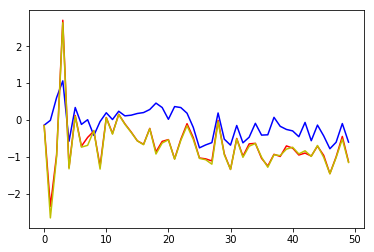

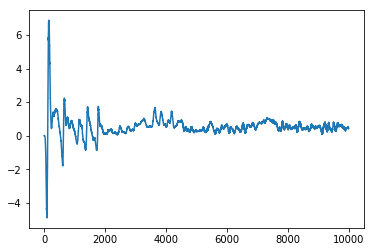

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(D_real_error_per_epoch,'b')
plt.plot(D_fake_error_per_epoch,'r')
plt.plot(G_error_per_epoch,'y')
plt.figure()
plt.plot(Wasserstein_per_epoch)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
torch.save(D.state_dict(),'./model.model')
gen_input = Variable(gi_sampler(1000, g_input_size))
#         print(gen_input[0])
g_fake_data = G(gen_input)
# prelists = []
decode = decode_record(g_fake_data)
for i in range(13):
    prelist = []
    for record in decode:
        prelist.append(record[i])
#     prelists.append(prelist)
    plt.figure()
    plt.hist(prelist)
# D = Discriminator(input_size=d_input_func(d_input_size), hidden_size=d_hidden_size, output_size=d_output_size)
# D.load_state_dict(torch.load('./model.model'))

plt.show()

torch.Size([1000, 929])


Toy main

Using data [Raw data]
torch.Size([929])
torch.Size([929])
0	: D:   0.65	/  0.72	 G:   0.68	 (Real: [16.48211811830218, 52.74006980386205]	, Fake: [0.07222444269983119, 0.15457591187688163]	) 


/home/wilburzhai/miniconda3/envs/mlp/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


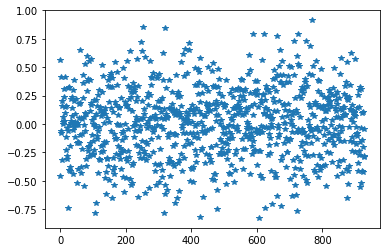

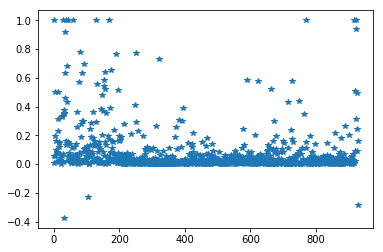

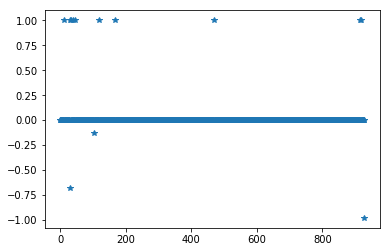

In [6]:
#!/usr/bin/env python

# Generative Adversarial Networks (GAN) example in PyTorch.
# See related blog post at https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f#.sch4xgsa9
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# Data params
data_mean = 4
data_stddev = 1.25

# Model params
g_input_size = 100     # Random noise dimension coming into generator, per output vector
g_hidden_size = 50   # Generator complexity
g_output_size = 929    # size of generated output vector
d_input_size = 929   # Minibatch size - cardinality of distributions
d_hidden_size = 50   # Discriminator complexity
d_output_size = 1    # Single dimension for 'real' vs. 'fake'
minibatch_size = 100

d_learning_rate = 2e-4  # 2e-4
g_learning_rate = 2e-4
optim_betas = (0.9, 0.999)
num_epochs = 1
print_interval = 200
d_steps = 1  # 'k' steps in the original GAN paper. Can put the discriminator on higher training freq than generator
g_steps = 1

# ### Uncomment only one of these
(name, preprocess, d_input_func) = ("Raw data", lambda data: narrow_and_expand(data), lambda x: x)
# (name, preprocess, d_input_func) = ("Data and variances", lambda data: decorate_with_diffs(data, 2.0), lambda x: x * 2)

print("Using data [%s]" % (name))
test1 = []
test2 = []
test3 = []
# ##### DATA: Target data and generator input data
var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
def onehot(labels, C):     
    one_hot = torch.FloatTensor(labels.size(0), C).zero_()
#         print(one_hot.size(),labels.unsqueeze(1).long().size())
    target = one_hot.scatter_(1, labels.long(), 1)
    return target

def narrow_and_expand(x):
    list = []
    for i in range(len(var_num)):
        if var_num[i] == 1:
            list.append(((x.narrow(1,i,1)-mean[i])/std[i]))
        else:
            list.append(onehot(x.narrow(1,i,1), var_num[i]))
#             print(list[i].size())

    return Variable(torch.cat(list,1))

def get_distribution_sampler(mu, sigma):
#     return lambda n: torch.Tensor(np.random.normal(mu, sigma, (1, n)))  # Gaussian
    return lambda n: torch.Tensor(table[np.random.randint(table.shape[0],size=minibatch_size),:])

def get_generator_input_sampler():
    return lambda m, n: torch.rand(m, n)  # Uniform-dist data into generator, _NOT_ Gaussian

# ##### MODELS: Generator model and discriminator model

class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
    
    def narrow_and_limited(self, x):
        list = []
        length=0
#         print(x.size())
        for i in range(len(self.var_num)):
            if self.var_num[i] == 1:
                list.append(x.narrow(1,length,1))
            else:
                max_value, _ = x.narrow(1,length,self.var_num[i]).max(dim=1)
#                 print(max_value.size(),x.narrow(1,length,self.var_num[i]).size())
#                 list.append(x.narrow(0,length,self.var_num[i]).argmax(dim=0).float())
                neg = x.narrow(1,length,self.var_num[i])-max_value.unsqueeze(1)
#                 print(neg.size())
                list.append(torch.pow(torch.tensor(100.0),neg))
            length = length+self.var_num[i]
#             print(list[i].size())
        return torch.cat(list,1)
    
    def forward(self, x):
        x = F.elu(self.map1(x))
#         print(x.size())
        x = F.sigmoid(self.map2(x))
#         print(x.size())
        x = self.map3(x)
        print(x[0,:].size())
        test1.append(x)
        result = self.narrow_and_limited(x) 
        test2.append(result)
#         print(result.size())
        return result

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
#         self.var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
                
    def forward(self, x):
        test3.append(x)
#         print(x.size())
#         x = self.narrow_and_expand(x)
        x = F.elu(self.map1(x))
        x = F.elu(self.map2(x))
        return F.sigmoid(self.map3(x))

def extract(v):
    return v.data.storage().tolist()

def stats(d):
    return [np.mean(d), np.std(d)]

def decorate_with_diffs(data, exponent):
    mean = torch.mean(data.data, 1, keepdim=True)
    mean_broadcast = torch.mul(torch.ones(data.size()), mean.tolist()[0][0])
    diffs = torch.pow(data - Variable(mean_broadcast), exponent)
    return torch.cat([data, diffs], 1)

d_sampler = get_distribution_sampler(data_mean, data_stddev)
gi_sampler = get_generator_input_sampler()
G = Generator(input_size=g_input_size, hidden_size=g_hidden_size, output_size=g_output_size)
D = Discriminator(input_size=d_input_func(d_input_size), hidden_size=d_hidden_size, output_size=d_output_size)
criterion = nn.BCELoss()  # Binary cross entropy: http://pytorch.org/docs/nn.html#bceloss
d_optimizer = optim.Adam(D.parameters(), lr=d_learning_rate, betas=optim_betas)
g_optimizer = optim.Adam(G.parameters(), lr=g_learning_rate, betas=optim_betas)

D_real_error_per_epoch = []
D_fake_error_per_epoch = []
G_error_per_epoch = []

for epoch in range(num_epochs):
    for d_index in range(d_steps):
        # 1. Train D on real+fake
        D.zero_grad()

        #  1A: Train D on real
        d_real_data = Variable(d_sampler(d_input_size))
#         print('d_real_data', preprocess(d_real_data).size())
        d_real_decision = D(preprocess(d_real_data))
        d_real_error = criterion(d_real_decision, Variable(torch.ones(minibatch_size)))  # ones = true
        d_real_error.backward() # compute/store gradients, but don't change params
#         print(D.map1.bias.grad)
        
        #  1B: Train D on fake
        d_gen_input = Variable(gi_sampler(minibatch_size, g_input_size))
        d_fake_data = G(d_gen_input).detach()  # detach to avoid training G on these labels
#         print('d_fake_data', d_fake_data.size())
#         d_fake_decision = D(preprocess(d_fake_data.t()))
        d_fake_decision = D(d_fake_data)
        d_fake_error = criterion(d_fake_decision, Variable(torch.zeros(minibatch_size)))  # zeros = fake
        d_fake_error.backward()
#         print(D.map1.bias.grad)
        d_optimizer.step()     # Only optimizes D's parameters; changes based on stored gradients from backward()

    for g_index in range(g_steps):
        # 2. Train G on D's response (but DO NOT train D on these labels)
        G.zero_grad()

        gen_input = Variable(gi_sampler(minibatch_size, g_input_size))
        g_fake_data = G(gen_input)
#         print(decode_record(g_fake_data))
        dg_fake_decision = D(g_fake_data)
        g_error = criterion(dg_fake_decision, Variable(torch.ones(minibatch_size)))  # we want to fool, so pretend it's all genuine

        g_error.backward()
#         print(G.map1.bias.grad)
        g_optimizer.step()  # Only optimizes G's parameters

    if epoch % print_interval == 0:
        D_real_error_per_epoch.append(extract(d_real_error)[0])
        D_fake_error_per_epoch.append(extract(d_fake_error)[0])
        G_error_per_epoch.append(extract(g_error)[0])
        print("%s\t: D: %6.2f\t/%6.2f\t G: %6.2f\t (Real: %s\t, Fake: %s\t) " % (epoch,
                                                            extract(d_real_error)[0],
                                                            extract(d_fake_error)[0],
                                                            extract(g_error)[0],
                                                            stats(extract(d_real_data)),
                                                            stats(extract(d_fake_data))))

        
import matplotlib.pyplot as plt
plt.figure()
# print(len(test1[0]))
plt.plot(test1[0].data.storage().tolist()[0:929],'*')
plt.figure()
plt.plot(test2[0].data.storage().tolist()[0:929],'*')
plt.figure()
plt.plot(test3[0].data.storage().tolist()[0:929],'*')
plt.show()

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000, -0.1585,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  

NameError: name 'decode_record' is not defined

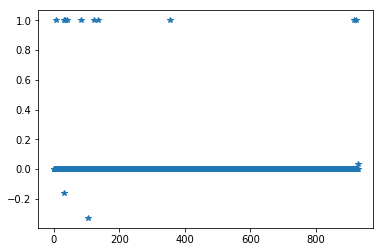

In [2]:
import matplotlib.pyplot as plt
# torch.save(D.state_dict(),'./model.model')
gen_input = Variable(gi_sampler(1, g_input_size))
# print(gen_input[0])
g_fake_data = G(gen_input)
print(G)
plt.plot(g_fake_data[0].data.storage().tolist(),'*')
# prelists = []
decode = decode_record(g_fake_data)
for i in range(13):
    prelist = []
    for record in decode:
        prelist.append(record[i])
#     prelists.append(prelist)
    
    plt.figure(figsize=(15, 5))
    a,b,c = plt.hist(table[:,i])
    plt.figure(figsize=(15,5))
    plt.hist(prelist, bins=b)
# D = Discriminator(input_size=d_input_func(d_input_size), hidden_size=d_hidden_size, output_size=d_output_size)
# D.load_state_dict(torch.load('./model.model'))

plt.show()

In [21]:
for record in decode[0:100]:
    print(record)

[tensor(1), tensor(0), 46.991756439208984, tensor(1), tensor(0), tensor(0), 0.034589365124702454, tensor(7), tensor(20), tensor(50), tensor(0), tensor(0), 1.7757470607757568]
[tensor(1), tensor(1), 45.743595123291016, tensor(2), tensor(0), tensor(0), 0.04294266924262047, tensor(13), tensor(17), tensor(651), tensor(1), tensor(0), 1.790101170539856]
[tensor(15), tensor(0), 47.3006477355957, tensor(1), tensor(0), tensor(0), 0.06497372686862946, tensor(4), tensor(11), tensor(39), tensor(0), tensor(0), 1.7727974653244019]
[tensor(1), tensor(0), 46.787357330322266, tensor(1), tensor(0), tensor(0), 0.05498985946178436, tensor(4), tensor(4), tensor(25), tensor(0), tensor(0), 1.7295172214508057]
[tensor(1), tensor(0), 45.59182357788086, tensor(1), tensor(0), tensor(0), 0.043156616389751434, tensor(13), tensor(17), tensor(73), tensor(1), tensor(0), 1.7829155921936035]
[tensor(1), tensor(0), 47.35697937011719, tensor(1), tensor(0), tensor(0), 0.042930662631988525, tensor(3), tensor(3), tensor(36)

[tensor(1), tensor(0), 46.77303695678711, tensor(1), tensor(0), tensor(0), 0.03297613561153412, tensor(2), tensor(20), tensor(50), tensor(0), tensor(0), 1.7440106868743896]
[tensor(1), tensor(1), 45.79216384887695, tensor(2), tensor(0), tensor(0), 0.03956539183855057, tensor(7), tensor(9), tensor(9), tensor(1), tensor(0), 1.7861549854278564]
[tensor(1), tensor(0), 47.97138214111328, tensor(1), tensor(0), tensor(0), 0.032886579632759094, tensor(4), tensor(6), tensor(9), tensor(0), tensor(0), 1.8672478199005127]
[tensor(1), tensor(0), 44.777469635009766, tensor(2), tensor(0), tensor(0), 0.03386493772268295, tensor(13), tensor(17), tensor(73), tensor(1), tensor(0), 1.8205254077911377]
[tensor(1), tensor(0), 47.17903518676758, tensor(1), tensor(0), tensor(0), 0.035584140568971634, tensor(7), tensor(9), tensor(212), tensor(0), tensor(0), 1.7648322582244873]
[tensor(1), tensor(0), 45.8416633605957, tensor(1), tensor(0), tensor(0), 0.0432257354259491, tensor(13), tensor(17), tensor(651), tens

In [ ]:
%run experiment.py -model WGAN_GP
# %run visual.py -model WGAN_GP
# %run visual.py -model GAN
# %run visual.py -model GAN_Gumbel_softmax

Generator architecture Generator_WGANGP(
  (dropout1): Dropout(p=0.2)
  (dropout2): Dropout(p=0.2)
  (main): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Dropout(p=0.2)
    (2): ReLU(inplace)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): Dropout(p=0.2)
    (5): ReLU(inplace)
    (6): Linear(in_features=100, out_features=929, bias=True)
  )
)
Discriminator architecture Discriminator_WGANGP(
  (main): Sequential(
    (0): Linear(in_features=929, out_features=100, bias=True)
    (1): Dropout(p=0.2)
    (2): ReLU(inplace)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): Dropout(p=0.2)
    (5): ReLU(inplace)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)


0	: D:   0.05	/  0.06	 G:  -0.01	
200	: D:   0.42	/ -0.68	 G:  -0.72	
400	: D:   0.20	/ -0.70	 G:  -0.73	
600	: D:   0.22	/  0.63	 G:   0.59	
800	: D:   0.42	/ -0.34	 G:  -0.39	
1000	: D:  -0.07	/ -0.79	 G:  -0.74	
1200	: D:   1.05	/  0.33	 G:   0.27	
1400	: D:   0.60	/  0.10	 G:   0.14	
1600	: D:   0.23	/ -1.49	 G:  -1.53	
1800	: D:   0.52	/  0.05	 G:   0.05	
2000	: D:   0.06	/ -0.84	 G:  -0.84	
2200	: D:   1.00	/  0.03	 G:  -0.00	


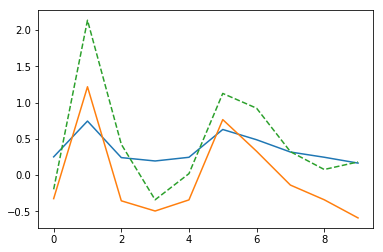

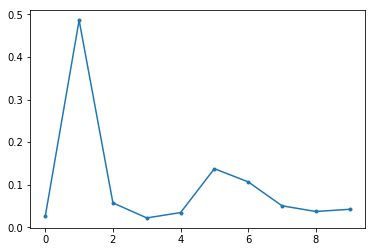

In [6]:
X = torch.rand(10)
U = torch.rand(10)
plt.plot(U.data.storage().tolist())
eps = 1e-20
Y = (-torch.log(-torch.log(U + eps) + eps))
plt.plot(Y.data.storage().tolist())
plt.plot((X+Y).data.storage().tolist(),'--')
temperature=0.8
y=X+Y
# plt.plot(F.softmax(y / temperature, dim=-1).data.storage().tolist())
plt.show()
plt.plot(F.softmax(y / temperature, dim=-1).data.storage().tolist())
plt.show()

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

def sample_gumbel(shape, eps=1e-20):
    U = torch.rand(shape)
    return -Variable(torch.log(-torch.log(U + eps) + eps))

def gumbel_softmax_sample(logits, temperature):
    y = logits + sample_gumbel(logits.size())
    return F.softmax(y / temperature, dim=-1)

def gumbel_softmax(logits, temperature):
    """
    input: [*, n_class]
    return: [*, n_class] an one-hot vector
    """
    y = gumbel_softmax_sample(logits, temperature)
    shape = y.size()
    _, ind = y.max(dim=-1)
    y_hard = torch.zeros_like(y).view(-1, shape[-1])
    y_hard.scatter_(1, ind.view(-1, 1), 1)
    y_hard = y_hard.view(*shape)
    return (y_hard - y).detach() + y

if __name__ == '__main__':
    import math
    print(gumbel_softmax(Variable(torch.FloatTensor([[math.log(0.1), math.log(0.4), math.log(0.3), math.log(0.2)]] * 20000)),     0.8).sum(dim=0))

tensor([ 2042.,  7918.,  6000.,  4040.])


In [5]:
from model import *
import numpy as np
original = np.ones((100,10))
syn = np.zeros((100,10))
# syn[0] = np.ones((1,10))
D = DisclosureRisk(100,100)
D.classification_matrix(syn,original)
print(D.output(mode='max'))
print(D.c)
# print(syn)

0.0
0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0.

In [8]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
# from torch.autograd import Variable

m = nn.Dropout(inplace=False)
input = torch.randn(10, 7)
m.training = False
output = m(input)
print(output)

tensor([[-0.0169,  0.1299,  0.3139,  0.3892,  0.6482,  0.1997,  1.2488],
        [ 1.5587,  0.4392, -0.4603, -0.5934,  0.1703, -0.7735, -0.4408],
        [-0.0030,  0.0282,  0.9843,  1.1793, -0.0189, -1.5664,  0.4358],
        [-1.3961,  0.4360,  0.7299,  1.3039,  0.5040, -1.6046,  0.4819],
        [ 0.5288,  1.9680, -1.4998, -0.6318,  1.2734,  0.5402,  1.3842],
        [ 1.2198,  0.9990,  0.8372,  0.2850, -0.0873,  0.1113, -1.4472],
        [ 0.1650,  0.4271,  0.8870, -1.8588, -0.4870,  0.2636,  0.2856],
        [-0.9831, -2.4492, -0.0485,  0.6325, -0.8467,  0.4081,  0.2289],
        [ 0.8486,  0.4928,  0.7310, -0.7768, -0.0650, -0.0239, -1.8136],
        [-0.4559,  2.7603,  0.5393,  0.7471, -0.6058, -0.8154, -0.7260]])


In [1]:
import numpy as np
from collections import defaultdict
table = np.load('ICEM_preprocessed.npy')
def tree(): return defaultdict(tree)
def dicts(t): return {k: dicts(t[k]) for k in t}
occ = tree()
for x in range(table.shape[0]):
#     if x % 1000 == 0:
    occ[int(table[x,7])][int(table[x,8])][int(table[x,9])]=True
# print(dicts(occ))

np.save('occ_tree.npy',occ)
#     break
    